# Exercício de programação: Regressão Linear
## Alunos:
### - **Leonardo Leite Meira - 20183005069**
### - **Rafael Silvério de Sá Lopes - 20183012994**

## Imports necessários

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

## 1. Regressão linear com uma variável

## 1.2 Plotando os dados

<AxesSubplot:xlabel='population', ylabel='profit'>

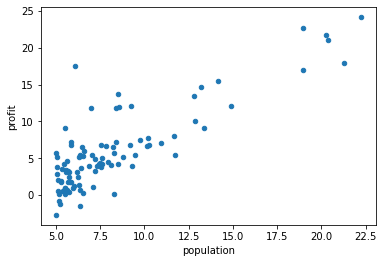

In [57]:
columns_names = ['population', 'profit']
df_city_profit = pd.read_csv(
    "./data1.txt", sep=",", header=None, names=columns_names)


df_city_profit.plot.scatter(x="population", y="profit")

## 1.3 Gradiente descendente

### Função custo

In [58]:
def cost_function(X, y, theta):
    m = len(y)
    hypothesis = np.sum(np.multiply(X, theta), axis=1)
    squaredError = np.power(np.subtract(hypothesis, y), 2)
    cost = 1/(2*m) * np.sum(squaredError)
    return cost

### Algoritmo Gradiente descendente

In [59]:
def gradient_descendent(X, y, theta, alpha):
    m = len(y)

    hypothesis = np.sum(np.multiply(X, theta), axis=1)
    error = np.subtract(hypothesis, y)
    theta_new = alpha * 1/m * np.sum(np.multiply(X.T, error), axis=1)
    theta = np.subtract(theta, theta_new)

    return theta

### Cálculo dos parâmetros da regressão linear e da função custo

In [60]:
num_iterations = 2000
alpha = 0.01

m = len(df_city_profit['profit'])
theta0 = random.randint(1, 25)
theta1 = random.randint(1, 25)

theta = np.asarray([theta0, theta1]).astype(float)
x = df_city_profit['population'].to_numpy()
X = np.vstack((np.ones(m), x.T)).T
y = df_city_profit['profit'].to_numpy()
cost_array = []
hypothesis_array = []

for i in range(num_iterations):
    hypothesis_array.append(np.sum(np.multiply(X, theta), axis=1))
    theta = gradient_descendent(X, y, theta, alpha)
    cost_array.append(cost_function(X, y, theta))

### Função custo em relação ao número de iterações

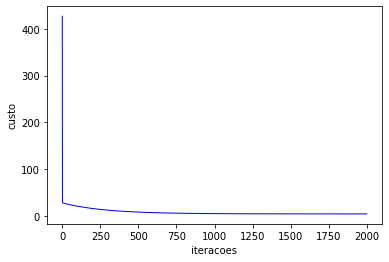

In [61]:
plt.plot(cost_array[0:len(cost_array)], color='blue', linewidth=1)
plt.xlabel("iteracoes")
plt.ylabel("custo")
plt.show()

### Traçando o ajuste linear

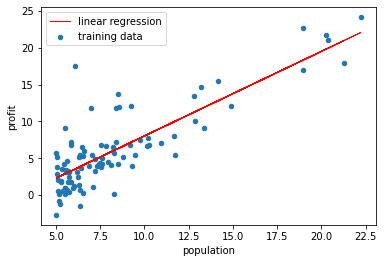

In [62]:
df_city_profit.plot.scatter(x="population", y="profit", label="training data")
plt.plot(X[:, [1]], np.sum(np.multiply(X, theta), axis=1),
         color='red', linewidth=1, label="linear regression")
plt.legend()
plt.show()

## 2. Regressão linear com múltiplas variáveis

## 2.1 Feature Normalization

### Data Frame inicial

In [63]:
columns = ['size', 'bedrooms', 'price']
df_house_price = pd.read_csv(
    "./data2.txt", sep=",", header=None, names=columns)
df_house_price

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


### Funções para realizar a normalização

In [64]:
def normalization_of_x(x, average, standard_deviation):
    return (x-average)/standard_deviation


def normalize_column(column):
    average = np.average(column)
    standard_deviation_value = np.std(column)
    size_of_column = len(column)
    new_array = [normalization_of_x(
        column[index], average, standard_deviation_value) for index in range(0, size_of_column)]
    return np.array(new_array)


def normalize_df(df):
    new_size_column = normalize_column(df['size'])
    new_bedrooms_column = normalize_column(df['bedrooms'])
    new_price_column = normalize_column(df['price'])
    new_df = pd.DataFrame(
        {'size': new_size_column, 'bedrooms': new_bedrooms_column, 'price': new_price_column})
    new_df.columns = ['size', 'bedrooms', 'price']
    return new_df

### Data Frame normalizado

In [65]:
normalized_df = normalize_df(df_house_price)

normalized_df

,size,bedrooms,price
0,0.131415,-0.226093,0.480890
1,-0.509641,-0.226093,-0.084983
2,0.507909,-0.226093,0.231097
3,-0.743677,-1.554392,-0.876398
4,1.271071,1.102205,1.612637
5,-0.019945,1.102205,-0.327501
6,-0.593589,-0.226093,-0.206242
7,-0.729686,-0.226093,-1.143175
8,-0.789467,-0.226093,-1.038076
9,-0.644466,-0.226093,-0.791517


## 2.2 Gradiente descendente

Cálculo da Função custo e Algoritmo Gradiente descendente já implementados anteriormente

### Cálculo dos parâmetros da regressão linear e da função custo utilizando diferentes taxas de aprendizado

In [66]:
num_iterations = 2000

def execute(alpha):
    m = len(normalized_df['price'])
    theta0 = random.randint(1, 25)
    theta1 = random.randint(1, 25)
    theta2 = random.randint(1, 25)

    theta = np.asarray([theta0, theta1, theta2]).astype(float)
    x1 = normalized_df['size'].to_numpy()
    x2 = normalized_df['bedrooms'].to_numpy()
    X = np.vstack((x1, x2))
    X = np.vstack((np.ones(m), X)).T
    y = normalized_df['price'].to_numpy()
    cost_array = []
    hypothesis_array = []

    for i in range(num_iterations):
        hypothesis_array.append(np.sum(np.multiply(X, theta), axis=1))
        theta = gradient_descendent(X, y, theta, alpha)
        cost_array.append(cost_function(X, y, theta))

    return cost_array[0:len(cost_array)]

### Função custo em relação ao número de iterações com diferentes taxas de aprendizado

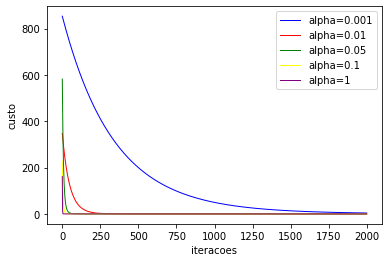

In [67]:
alpha = [0.001, 0.01, 0.05, 0.1, 1]
colors = ['blue', 'red', 'green', 'yellow', 'purple']

for i in range(0, len(alpha)):
    plt.plot(execute(alpha[i]), color=colors[i],
             linewidth=1, label=f"alpha={alpha[i]}")

plt.xlabel("iteracoes")
plt.ylabel("custo")
plt.legend()
plt.show()

Pode-se perceber que quanto maior o valor de alfa mais rápido a função de custo converge, porém, para um valor de alfa grande, por exemplo 3(esse valor não foi plotado pois muda totalmente a proporção do gráfico e não é possível ver as outras funções de custo), a função já não converge.

### 2.3 Veja que agora não é possível traçar o ajuste linear como no exercício anterior. Por quê?

Não é possivel traçar o ajuste linear, pois agora temos duas variáveis independentes, ou seja, o problema se tornou multi-dimensional e o ajuste linear é feito apenas para problemas bidimensionais.

## 3. Equação Normal